In [1]:
import uproot
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
import awkward as ak
import os


In [2]:
# Directory path containing the ROOT files
directory_path = '/eos/purdue/store/user/lingqian/fullrun2_eft_minitrees/spinCorrInput_2016preVFP/Nominal'

# Define the specific files you want to include (with subdirectories)
desired_files = [
    'ee/ee_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'ee/ee_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'ee/ee_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root',
    
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_0to700_2016preVFP.root',
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_700to900_2016preVFP.root',
    'mumu/mumu_ttto2l2nu_jet_smeft_mtt_900toInf_2016preVFP.root'
]

# Construct the full paths for the desired files
file_paths = [os.path.join(directory_path, filename) for filename in desired_files]

# Open each ROOT file and extract the 'ttBar_treeVariables_step8' TTree
trees = [uproot.open(file_path)['ttBar_treeVariables_step0'] for file_path in file_paths]

# Concatenate the TTrees from all files into a single TTree
file = uproot.concatenate(trees)

In [1]:
import Event_weight_prediction
import numpy as np
import NN_EFT

# Load precomputed stored SC values
SC_saved = np.load('/depot/cms/top/bhanda25/EFT_minitree/Stored_SC/Stored_SC_541k.npy', allow_pickle=True)


# Define a 16-dimensional Wilson coefficient vector
wc_vector_ctgRe = [0] * 16  # Assume a 16-dimensional WC space
wc_vector_ctgRe[0] = -2  # Modify only the relevant WC

# Define a 16-dimensional Wilson coefficient vector
wc_vector_ctgIm = [0] * 16  # Assume a 16-dimensional WC space
wc_vector_ctgIm[1] = 2  # Modify only the relevant WC

#Compute the event weight for corresponding wilson coefficient
ctgRe,_,_=Event_weight_prediction.event_weights_lin_quad(SC_saved, wc_vector_ctgRe)
ctgIm,_,_=Event_weight_prediction.event_weights_lin_quad(SC_saved, wc_vector_ctgIm)

#Here is the event weight for reference hypothesis
weight_sm=file['mgWeights'][:,200]

mask_file = (file['gen_l_pt'] > 0) & (file['gen_lbar_pt'] > 0)



NameError: name 'file' is not defined

/tmp/ipykernel_19989/2395675244.py:25: RuntimeWarning: divide by zero encountered in log
  log_likelihood_ratio = np.log(likelihood_ratio)


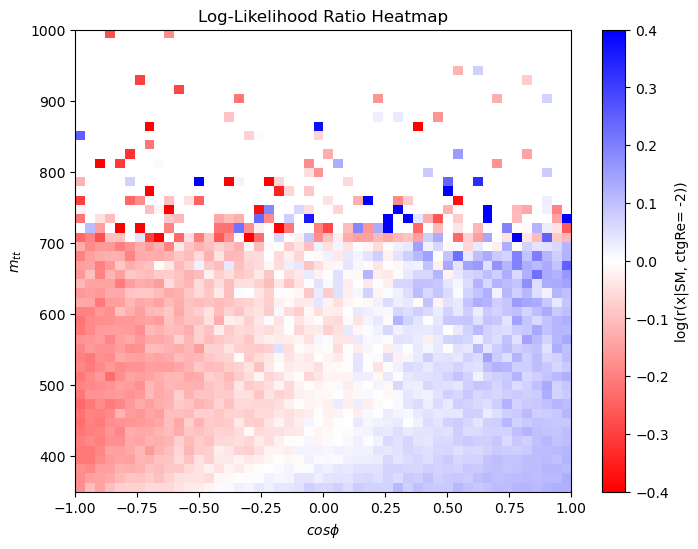

In [98]:
import numpy as np
import matplotlib.pyplot as plt
import awkward as ak

def compute_likelihood_ratio_2D(x_obs, y_obs, weight_sm, weight_eft, bins=50):
    """Compute and plot a 2D likelihood ratio heatmap for two observables with log likelihood ratio"""

    # Define 2D binning
    x_bins = np.linspace(-1, 1, bins + 1)  
    y_bins = np.linspace(350, 1000, bins + 1)    

    # Convert Awkward arrays to NumPy
    x_obs_np = ak.to_numpy(x_obs)
    y_obs_np = ak.to_numpy(y_obs)
    weight_sm_np = ak.to_numpy(weight_sm)
    weight_eft_np = ak.to_numpy(weight_eft)

    # Compute 2D histograms
    hist_sm, x_edges, y_edges = np.histogram2d(x_obs_np, y_obs_np, bins=[x_bins, y_bins], weights=weight_sm_np, density=True)
    hist_eft, _, _ = np.histogram2d(x_obs_np, y_obs_np, bins=[x_bins, y_bins], weights=weight_eft_np, density=True)

    # Avoid division by zero
    epsilon = 1e-15
    likelihood_ratio = hist_eft / (hist_sm + epsilon)
    log_likelihood_ratio = np.log(likelihood_ratio)
    
    # Plot the heatmap
    plt.figure(figsize=(8, 6))
    plt.imshow(log_likelihood_ratio.T, origin='lower', 
               extent=[x_bins[0], x_bins[-1], y_bins[0], y_bins[-1]], 
               aspect='auto', cmap='bwr_r', vmin=-0.4, vmax=0.4)
    
    plt.colorbar(label='log(r(x|SM, ctgRe= -2))')
    plt.xlabel('$cos \phi$')
    plt.ylabel('$m_{tt}$')
    plt.title('Log-Likelihood Ratio Heatmap')
    plt.show()

# Define the second observable
gen_mttbar = file_simple['gen_ttbar_mass'][mask_file]

# Compute and plot the likelihood ratio heatmap
compute_likelihood_ratio_2D(file_simple['gen_ll_cHel'][mask_file], gen_mttbar, weight_sm[mask_file], ctgRe[mask_file])


In [ ]:
# Plot heatmap
    plt.figure(figsize=(8, 6))
    likelihood_ratio_np = ak.to_numpy(likelihood_ratio)
    plt.pcolormesh(x_bins, y_bins, likelihood_ratio_np.T, shading='auto', cmap='viridis')
    plt.colorbar(label="Likelihood Ratio r(x)")
    plt.xlabel("gen_c_kk")
    plt.ylabel("gen_mttbar")
    plt.title("2D Likelihood Ratio: $r(x) = w_{EFT} / w_{SM}$")
    plt.show()


In [ ]:


wilson_coeffs = np.random.choice([-2, -1, 1, 2], size=len(observables))  # Example Wilson coefficient values
labels = np.random.choice([0, 1], size=len(observables))  # Example labels (SM = 0, EFT = 1)
weights = np.random.rand(len(observables))  # Event weights (from reweighting strategy)

# Split dataset into train and validation
dataset = WilsonDataset(observables, wilson_coeffs, labels, weights)
train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=213, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=213, shuffle=False)

# Initialize and Train Model
input_dim = observables.shape[1] + 1  # Number of features + Wilson coefficient
model = LikelihoodNN(input_dim)
train_model(model, train_loader, val_loader)
